# Data Preprocessing with scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset("titanic")
titanic_data = titanic_data[["age","fare","pclass"]]
titanic_data.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [4]:
titanic_data.describe()

,age,fare,pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


## Features Scaling

### Standard Scale

We can use standard scale to standarize data scales, because larger data will affect our model.  

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [7]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled,columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377


<Axes: xlabel='age', ylabel='Density'>

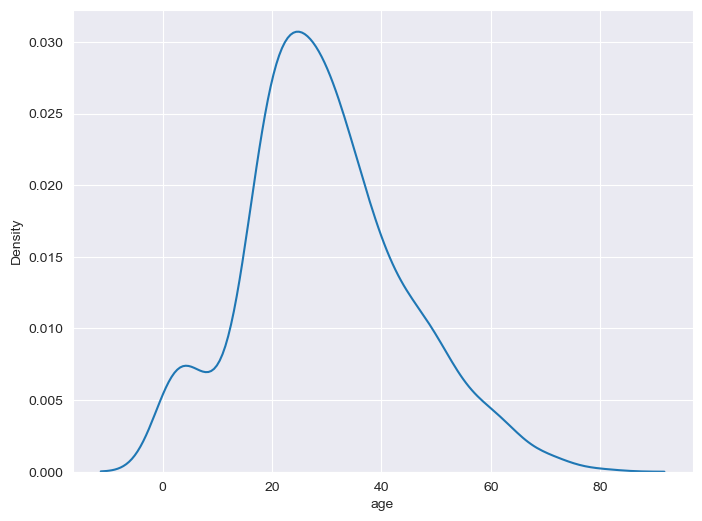

In [8]:
sns.kdeplot(titanic_data['age'])

<Axes: xlabel='age', ylabel='Density'>

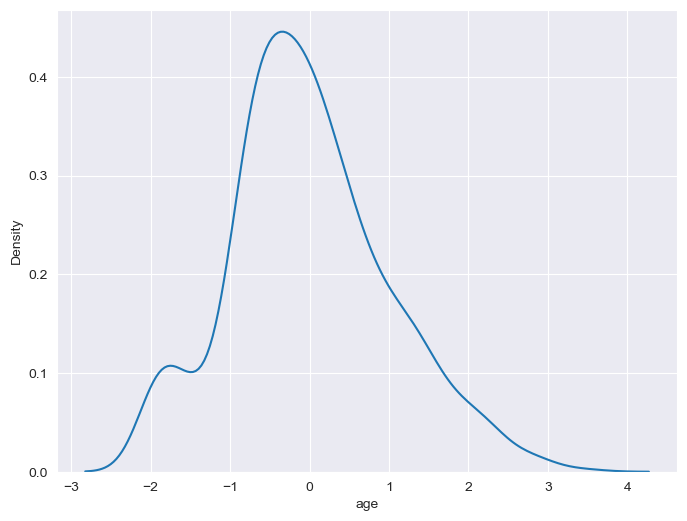

In [9]:
sns.kdeplot(titanic_data_scaled['age'])

Two graphs above show that Standard Scaling doesn't affect data distributions. 

### Min/Max Scaling

In min/max scaling, we subtract each value by the minimum value and then divide by the difference btw min and max value in the dataset. 

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [12]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled,columns=titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,0.271174,0.014151,1.0
1,0.472229,0.139136,0.0
2,0.321438,0.015469,1.0
3,0.434531,0.103644,0.0
4,0.434531,0.015713,1.0


<Axes: xlabel='age', ylabel='Density'>

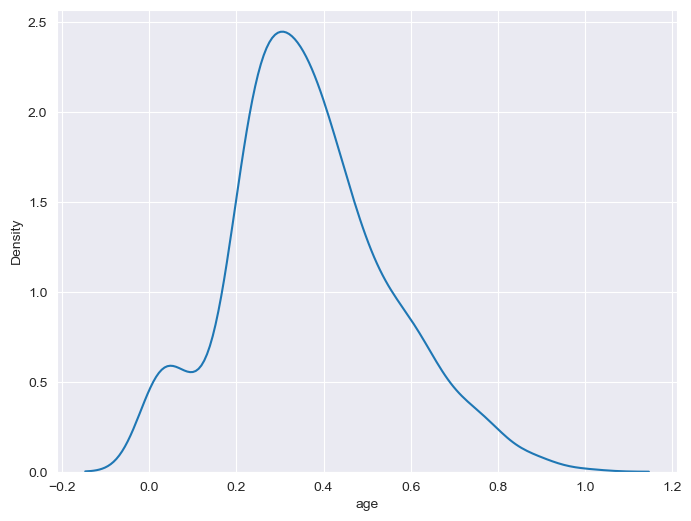

In [13]:
sns.kdeplot(titanic_data_scaled['age'])

Above chart shows that min/max scaling technique won't affect data distributions. 

### Mean Normalization

In mean normalization, the mean of the dataset is subtracted from each value and result is divided by the range. 

In [15]:
mean_val = titanic_data.mean(axis=0)
mean_val

age       29.699118
fare      32.204208
pclass     2.308642
dtype: float64

In [16]:
range_vals = titanic_data.max(axis=0) - titanic_data.min(axis=0)
range_vals

age        79.5800
fare      512.3292
pclass      2.0000
dtype: float64

<Axes: xlabel='age', ylabel='Density'>

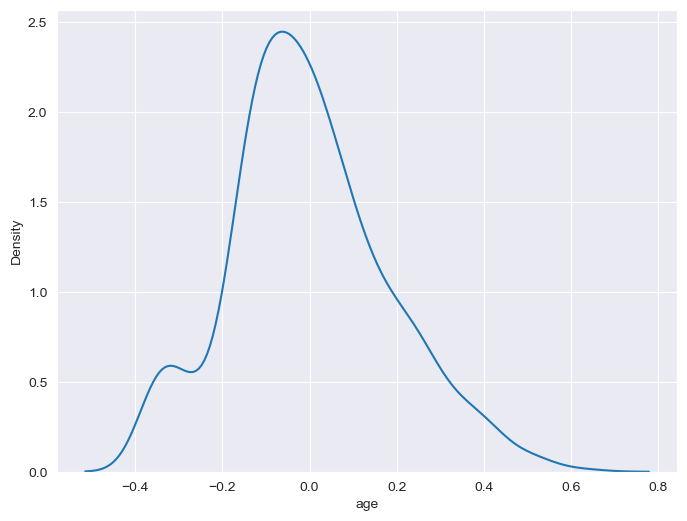

In [17]:
titanic_data_scaled = (titanic_data - mean_val)/range_vals
sns.kdeplot(titanic_data_scaled['age'])

Above chart shows that mean normalization technique won't affect data distributions. 

## Handling Missing Numberical Data

### Mean or Median Imputation

In mean or median imputation, missing values in a column are replaced by the mean or meian of all the remaining values in the particular column. 

In [19]:
titanic_data.isnull().mean()

age       0.198653
fare      0.000000
pclass    0.000000
dtype: float64

In [21]:
median = titanic_data['age'].median()
print(median)
mean = titanic_data['age'].mean()
print(mean)

28.0
29.69911764705882


In [22]:
titanic_data["Mean Age"] = titanic_data.age.fillna(mean)
titanic_data["Mean Age"] = np.round(titanic_data["Mean Age"],1)

titanic_data["Median Age"] = titanic_data.age.fillna(median)

In [23]:
titanic_data.head(20)

,age,fare,pclass,Mean Age,Median Age
0,22.0,7.2500,3,22.0,22.0
1,38.0,71.2833,1,38.0,38.0
2,26.0,7.9250,3,26.0,26.0
3,35.0,53.1000,1,35.0,35.0
4,35.0,8.0500,3,35.0,35.0
5,NaN,8.4583,3,29.7,28.0
6,54.0,51.8625,1,54.0,54.0
7,2.0,21.0750,3,2.0,2.0
8,27.0,11.1333,3,27.0,27.0
9,14.0,30.0708,2,14.0,14.0


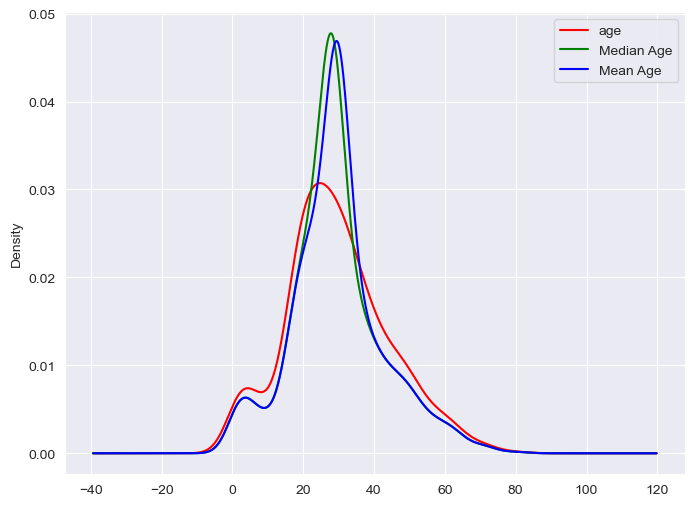

In [25]:
plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)
kde = "kde"

titanic_data['age'].plot(kind=kde,ax=ax, color="red")
titanic_data['Median Age'].plot(kind=kde,ax=ax, color="green")
titanic_data['Mean Age'].plot(kind=kde,ax=ax, color="blue")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

### EOD Method

<Axes: >

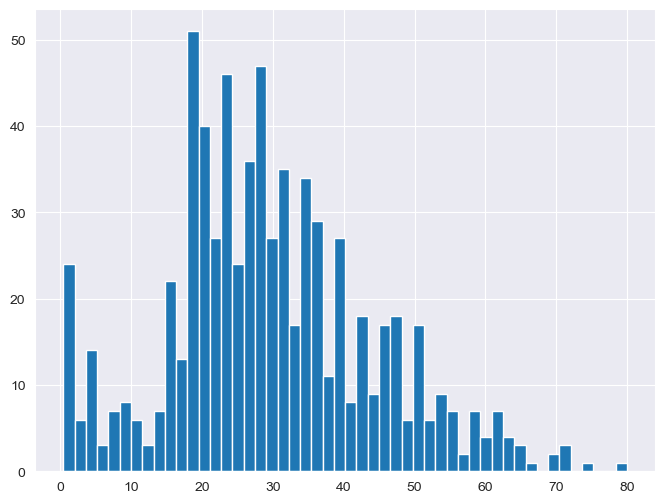

In [26]:
titanic_data.age.hist(bins=50)

In [29]:
eod = titanic_data.age.mean() + titanic_data.age.std()*3
eod = np.round(eod,0)
eod

73.0

In [30]:
titanic_data['Age Eod'] = titanic_data.age.fillna(eod)
titanic_data.head(20)

,age,fare,pclass,Mean Age,Median Age,Age Eod
0,22.0,7.2500,3,22.0,22.0,22.0
1,38.0,71.2833,1,38.0,38.0,38.0
2,26.0,7.9250,3,26.0,26.0,26.0
3,35.0,53.1000,1,35.0,35.0,35.0
4,35.0,8.0500,3,35.0,35.0,35.0
5,NaN,8.4583,3,29.7,28.0,73.0
6,54.0,51.8625,1,54.0,54.0,54.0
7,2.0,21.0750,3,2.0,2.0,2.0
8,27.0,11.1333,3,27.0,27.0,27.0
9,14.0,30.0708,2,14.0,14.0,14.0


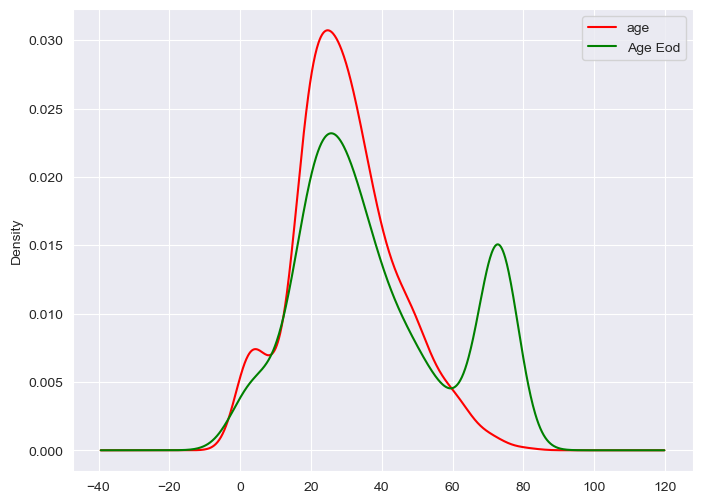

In [31]:
plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)
kde = "kde"

titanic_data['age'].plot(kind=kde,ax=ax, color="red")
titanic_data['Age Eod'].plot(kind=kde,ax=ax, color="green")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

## Handling Missing Categorical Data

### Frequent Category Imputation

This method uses the most common categorical data(the mode) in the dataset to replace missing values. 

In [36]:
titanic_data = sns.load_dataset("titanic")
titanic_data_cate = titanic_data[["embark_town","age","fare"]]
titanic_data_cate.head()
titanic_data_cate.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

Text(0, 0.5, 'Number of Passengers')

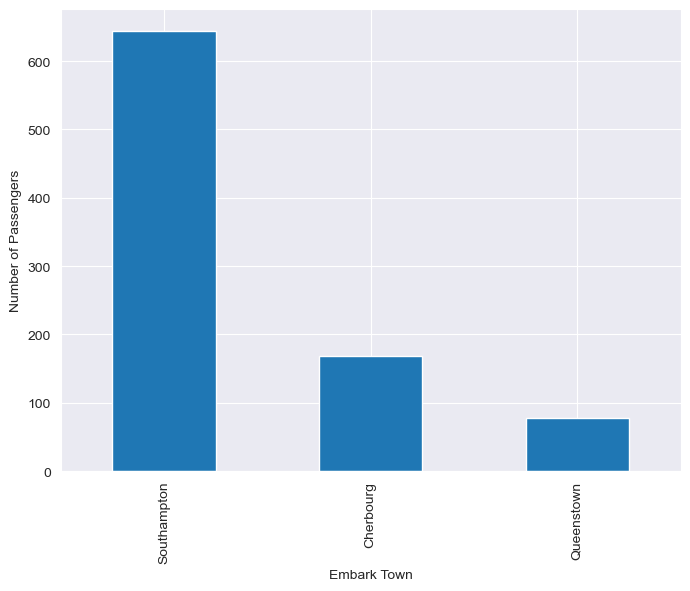

In [39]:
titanic_data_cate.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("Embark Town")
plt.ylabel("Number of Passengers")

In [40]:
titanic_data_cate.embark_town.mode()

0    Southampton
Name: embark_town, dtype: object

In [42]:
titanic_data.embark_town.fillna("Southampton",inplace=True)

In [43]:
titanic_data['age mode'] = titanic_data.age.fillna(24)
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0


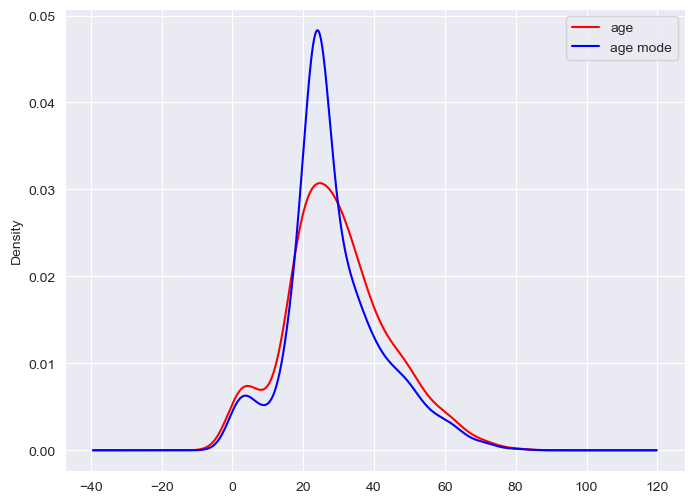

In [44]:
plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)
kde = "kde"

titanic_data['age'].plot(kind=kde,ax=ax, color="red")
titanic_data['age mode'].plot(kind=kde,ax=ax, color="blue")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

### Missing Category Imputation

In MCI, we use an arbitrary value to replace missing values. 

In [45]:
titanic_data = sns.load_dataset("titanic")
titanic_data = titanic_data[["embark_town","age","fare"]]
titanic_data.head()
titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

In [46]:
titanic_data.embark_town.fillna("Missing",inplace=True)

Text(0, 0.5, 'Number of Passengers')

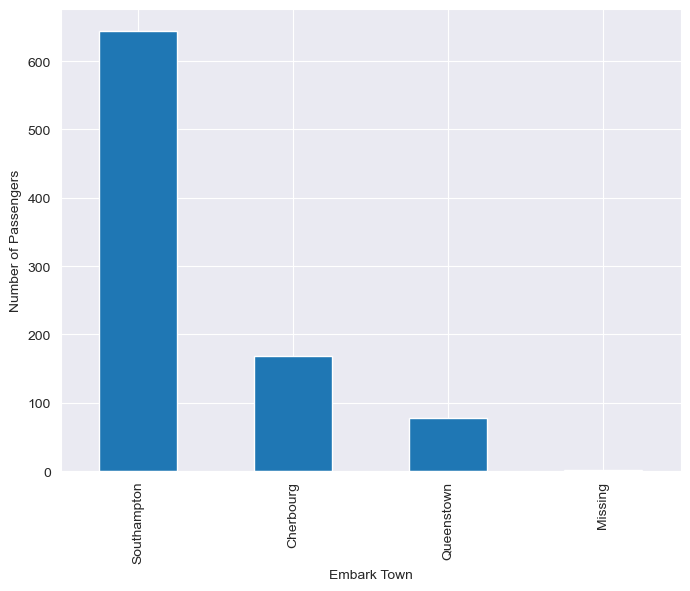

In [48]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("Embark Town")
plt.ylabel("Number of Passengers")

## Categorical Data Encoding

### One Hot Encoding

One hot encoding is one of the most commonly used categorical encoding schemes. For each unique value in the dataset we want to encoding, we add a new column and use "1" to represents the value and "0" to represents other values. 

In [49]:
titanic_data = sns.load_dataset("titanic")
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [50]:
titanic_data = titanic_data[["sex","class","embark_town"]]
titanic_data.head()

,sex,class,embark_town
0,male,Third,Southampton
1,female,First,Cherbourg
2,female,Third,Southampton
3,female,First,Southampton
4,male,Third,Southampton


In [51]:
print(titanic_data["sex"].unique())
print(titanic_data["class"].unique())
print(titanic_data["embark_town"].unique())

['male' 'female']
['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
['Southampton' 'Cherbourg' 'Queenstown' nan]


In [52]:
temp = pd.get_dummies(titanic_data["sex"])
temp.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [53]:
pd.concat([titanic_data["sex"],pd.get_dummies(titanic_data["sex"])],axis=1).head()

,sex,female,male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


In [55]:
temp1 = pd.get_dummies(titanic_data["embark_town"],drop_first=True,dummy_na=True)
temp2 = pd.get_dummies(titanic_data["class"])
temp1.head()

,Queenstown,Southampton,NaN
0,0,1,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0


### Label Encoding

We use different labels such as "1","2","3"...to represents each value. 

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(titanic_data["class"])

titanic_data["le_class"] = le.transform(titanic_data["class"])

titanic_data.head()

,sex,class,embark_town,le_class
0,male,Third,Southampton,2
1,female,First,Cherbourg,0
2,female,Third,Southampton,2
3,female,First,Southampton,0
4,male,Third,Southampton,2


## Data Discretization

Discretization is the process of converting continuous numeric values, such as price, age and weight into discrete intervals. 
It is very helpful in case when you have a skewed distribution of data. 

### Equal Width Discretization

In Equal Width Discretization, the width or the size of all the intervals remain the same. 

In [61]:
diamond_data = sns.load_dataset("diamonds")
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\luyil\AppData\Local\Temp\ipykernel_29348\109031386.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamond_data["price"])


<Axes: xlabel='price', ylabel='Density'>

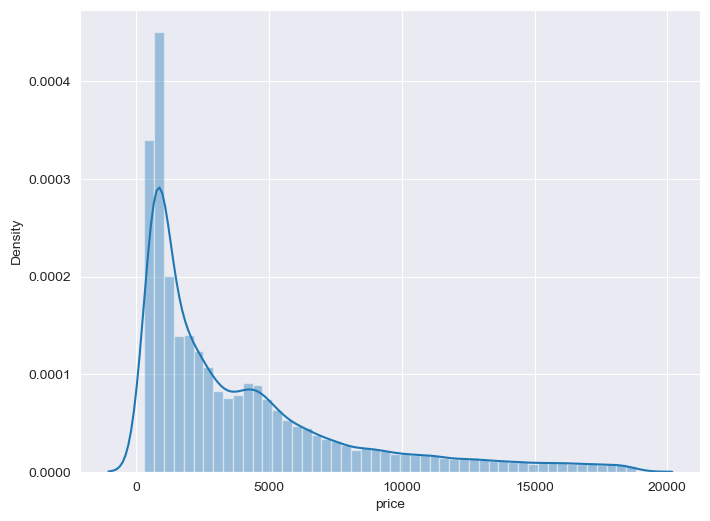

In [62]:
sns.distplot(diamond_data["price"])

In [63]:
price_range = diamond_data["price"].max() - diamond_data["price"].min()
price_range

18497

In [64]:
diamond_bin = price_range/10
diamond_bin

1849.7

In [66]:
lower_interval = int(np.floor(diamond_data["price"].min()))
upper_interval = int(np.ceil(diamond_data["price"].max()))

interval_length = int(np.round(price_range/10))

print(lower_interval,upper_interval,interval_length)

326 18823 1850


In [67]:
total_bins = [i for i in range(lower_interval,upper_interval+interval_length,interval_length)]
print(total_bins)

[326, 2176, 4026, 5876, 7726, 9576, 11426, 13276, 15126, 16976, 18826]


In [69]:
bin_labels = ["Bin_no_" + str(i) for i in range(1,len(total_bins))]
bin_labels

['Bin_no_1',
 'Bin_no_2',
 'Bin_no_3',
 'Bin_no_4',
 'Bin_no_5',
 'Bin_no_6',
 'Bin_no_7',
 'Bin_no_8',
 'Bin_no_9',
 'Bin_no_10']

In [70]:
diamond_data["price_bins"] = pd.cut(x=diamond_data["price"],bins=total_bins,labels=bin_labels,include_lowest=True)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bin_no_1'),
  Text(1, 0, 'Bin_no_2'),
  Text(2, 0, 'Bin_no_3'),
  Text(3, 0, 'Bin_no_4'),
  Text(4, 0, 'Bin_no_5'),
  Text(5, 0, 'Bin_no_6'),
  Text(6, 0, 'Bin_no_7'),
  Text(7, 0, 'Bin_no_8'),
  Text(8, 0, 'Bin_no_9'),
  Text(9, 0, 'Bin_no_10')])

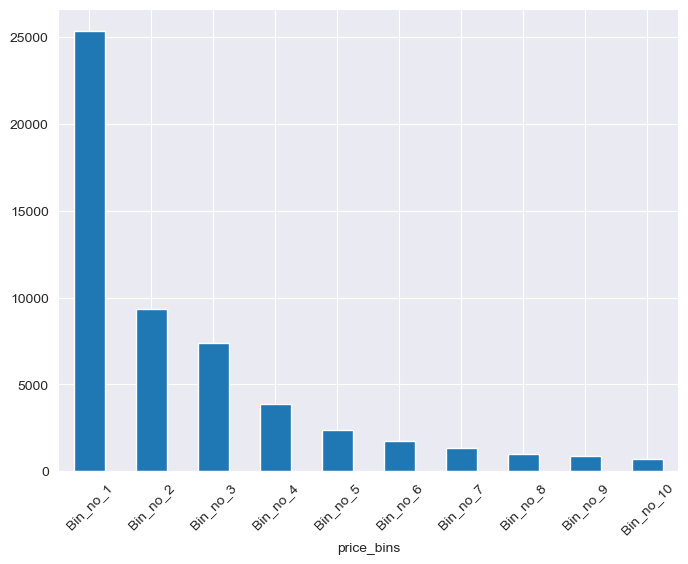

In [71]:
diamond_data.groupby("price_bins")["price"].count().plot.bar()
plt.xticks(rotation=45)

### Equal Frequency Discretization

In EFD, the bin width is adjusted automatically in suck a way that each bin contains exactly the same number of records or has the same frequency. 

In [72]:
diamond_data = sns.load_dataset("diamonds")

In [73]:
discretised_price, bins = pd.qcut(diamond_data["price"],10,labels=None,retbins=True,precision=3,duplicates="raise")
pd.concat([discretised_price,diamond_data["price"]],axis=1).head(10)

,price,price
0,"(325.999, 646.0]",326
1,"(325.999, 646.0]",326
2,"(325.999, 646.0]",327
3,"(325.999, 646.0]",334
4,"(325.999, 646.0]",335
5,"(325.999, 646.0]",336
6,"(325.999, 646.0]",336
7,"(325.999, 646.0]",337
8,"(325.999, 646.0]",337
9,"(325.999, 646.0]",338


In [74]:
print(bins)
print(type(bins))

[  326.    646.    837.   1087.   1698.   2401.   3465.   4662.   6301.2
  9821.  18823. ]
<class 'numpy.ndarray'>


In [75]:
discretised_price.value_counts()

(325.999, 646.0]     5411
(1698.0, 2401.0]     5405
(837.0, 1087.0]      5396
(6301.2, 9821.0]     5395
(3465.0, 4662.0]     5394
(9821.0, 18823.0]    5393
(4662.0, 6301.2]     5389
(1087.0, 1698.0]     5388
(646.0, 837.0]       5385
(2401.0, 3465.0]     5384
Name: price, dtype: int64

In [77]:
bin_labels = ["Bin_no_" + str(i) for i in range(1,11)]
bin_labels

['Bin_no_1',
 'Bin_no_2',
 'Bin_no_3',
 'Bin_no_4',
 'Bin_no_5',
 'Bin_no_6',
 'Bin_no_7',
 'Bin_no_8',
 'Bin_no_9',
 'Bin_no_10']

In [82]:
diamond_data["price_bins"] = pd.cut(x=diamond_data["price"],bins=bins,labels=bin_labels,include_lowest=True)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bin_no_1'),
  Text(1, 0, 'Bin_no_2'),
  Text(2, 0, 'Bin_no_3'),
  Text(3, 0, 'Bin_no_4'),
  Text(4, 0, 'Bin_no_5'),
  Text(5, 0, 'Bin_no_6'),
  Text(6, 0, 'Bin_no_7'),
  Text(7, 0, 'Bin_no_8'),
  Text(8, 0, 'Bin_no_9'),
  Text(9, 0, 'Bin_no_10')])

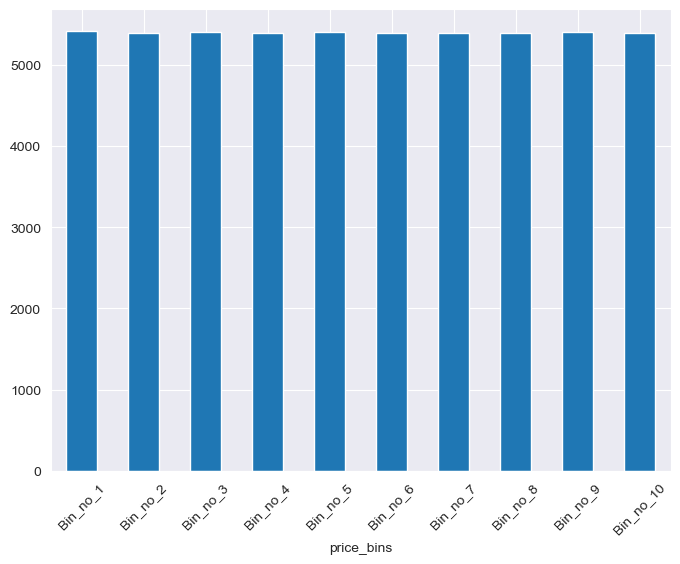

In [83]:
diamond_data.groupby("price_bins")["price"].count().plot.bar()
plt.xticks(rotation=45)

## Handling Outliers

Outliers are the values that are too far away from the rest of the data. 
#### Solutions:
- totally remove all outliers
- treat outliers as missing values and use imputations to process them
- use discretizations techniques 
- cap/censor the outliers and use min/max values to replace them

### Outlier Trimming
Simply rempoving the outliers beyond a certain threshold value. 
Advantages: extremely fast amd doesn't disort the data. 
Downside: it can reduce the data size. 

In [85]:
titanic_data = sns.load_dataset("titanic")
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: ylabel='age'>

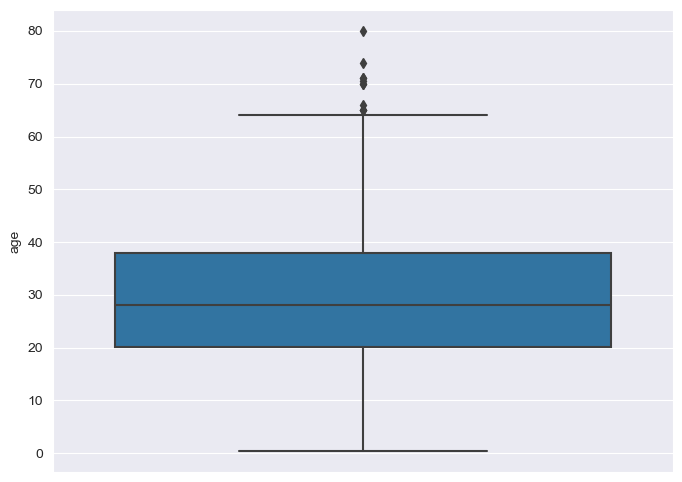

In [86]:
sns.boxplot(y="age",data=titanic_data)

In [87]:
# define outlier by using IQR
IQR = titanic_data["age"].quantile(0.75) - titanic_data["age"].quantile(0.25) 

lower_age_limit = titanic_data["age"].quantile(0.25) - (IQR*1.5)
upper_age_limit = titanic_data["age"].quantile(0.75) + (IQR*1.5)

print(lower_age_limit, upper_age_limit)


-6.6875 64.8125


In [88]:
age_outliers = np.where(
titanic_data["age"]>upper_age_limit, True,
np.where(titanic_data["age"]<lower_age_limit,True,False))

In [89]:
titanic_without_age_outliers = titanic_data.loc[~(age_outliers),]
titanic_data.shape, titanic_without_age_outliers.shape

((891, 15), (880, 15))

<Axes: ylabel='age'>

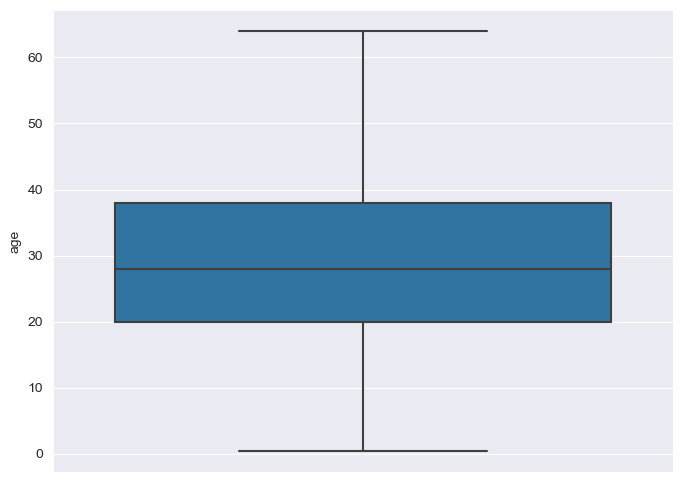

In [90]:
sns.boxplot(y="age",data=titanic_without_age_outliers)

### Outlier Capping using Mean and Std

Instead of using IQR, we can also using mean and std to define our thresholds. 
Upper_threshold = mean + 3 * std
Lower_threshold = mean - 3 * std

In [91]:
titanic_data = sns.load_dataset("titanic")
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: ylabel='age'>

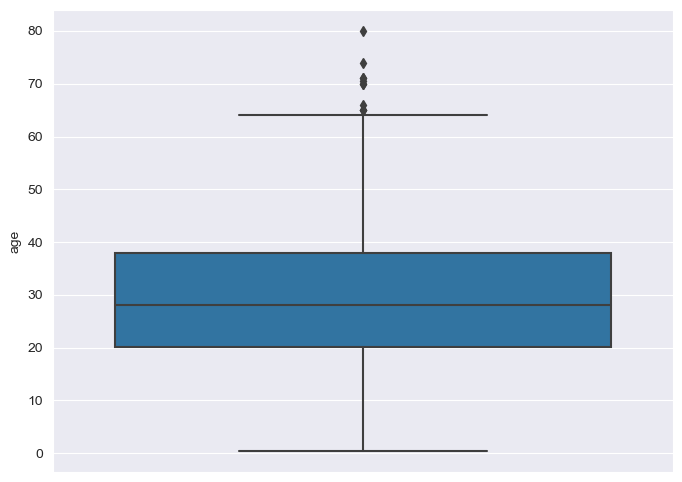

In [92]:
sns.boxplot(y="age",data=titanic_data)

In [93]:
lower_age_limit = titanic_data["age"].mean() - (titanic_data["age"].std()*3)
upper_age_limit = titanic_data["age"].mean() + (titanic_data["age"].std()*3)

print(lower_age_limit, upper_age_limit)

-13.88037434994331 73.27860964406095


In [94]:
age_outliers = np.where(
titanic_data["age"]>upper_age_limit, True,
np.where(titanic_data["age"]<lower_age_limit,True,False))

In [95]:
titanic_without_age_outliers = titanic_data.loc[~(age_outliers),]
titanic_data.shape, titanic_without_age_outliers.shape

((891, 15), (889, 15))

<Axes: ylabel='age'>

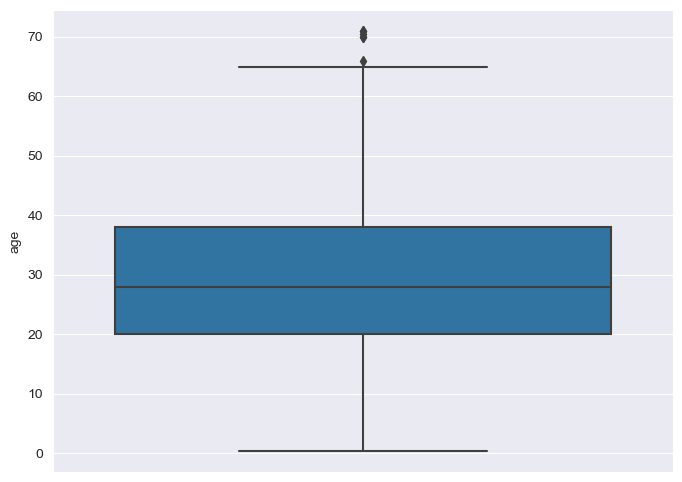

In [96]:
sns.boxplot(y="age",data=titanic_without_age_outliers)

## Exercises

Replace missing values in the "deck" column. 

In [98]:
titanic_data = sns.load_dataset("titanic")
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [102]:
missing_nums = titanic_data.deck.isnull().mean()
missing_nums

0.7721661054994389

In [104]:
# find mod
mod = titanic_data.deck.mode()
mod

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [105]:
# replace
titanic_data.deck.fillna('C',inplace=True)
titanic_data.deck.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: deck, Length: 891, dtype: bool

TypeError: Axes.bar() missing 2 required positional arguments: 'x' and 'height'

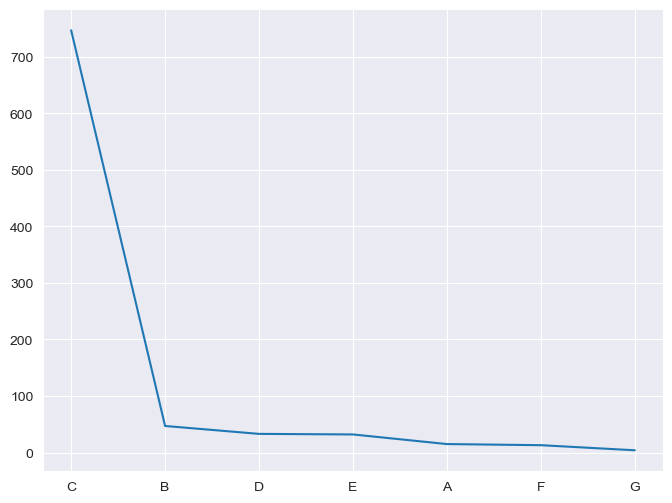

In [107]:
# plot
plt.rcParams["figure.figsize"] = [8,6]
titanic_data.deck.value_counts().sort_values(ascending=False).plot().bar()
plt.xlabel("deck")
plt.ylabel("Number")